In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pd.options.display.max_rows = 4000

In [12]:
raw = pd.read_csv('car_data.csv')

In [13]:
df = raw.copy()

In [14]:
col_name_map = {col: col.lower()  for col in list(df.columns)}
df.rename(columns=col_name_map, inplace=True)

In [15]:
df.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
df.shape

(301, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   kms_driven     301 non-null    int64  
 5   fuel_type      301 non-null    object 
 6   seller_type    301 non-null    object 
 7   transmission   301 non-null    object 
 8   owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
df.describe(include='all')

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [19]:
df.isna().sum()

car_name         0
year             0
selling_price    0
present_price    0
kms_driven       0
fuel_type        0
seller_type      0
transmission     0
owner            0
dtype: int64

<AxesSubplot:>

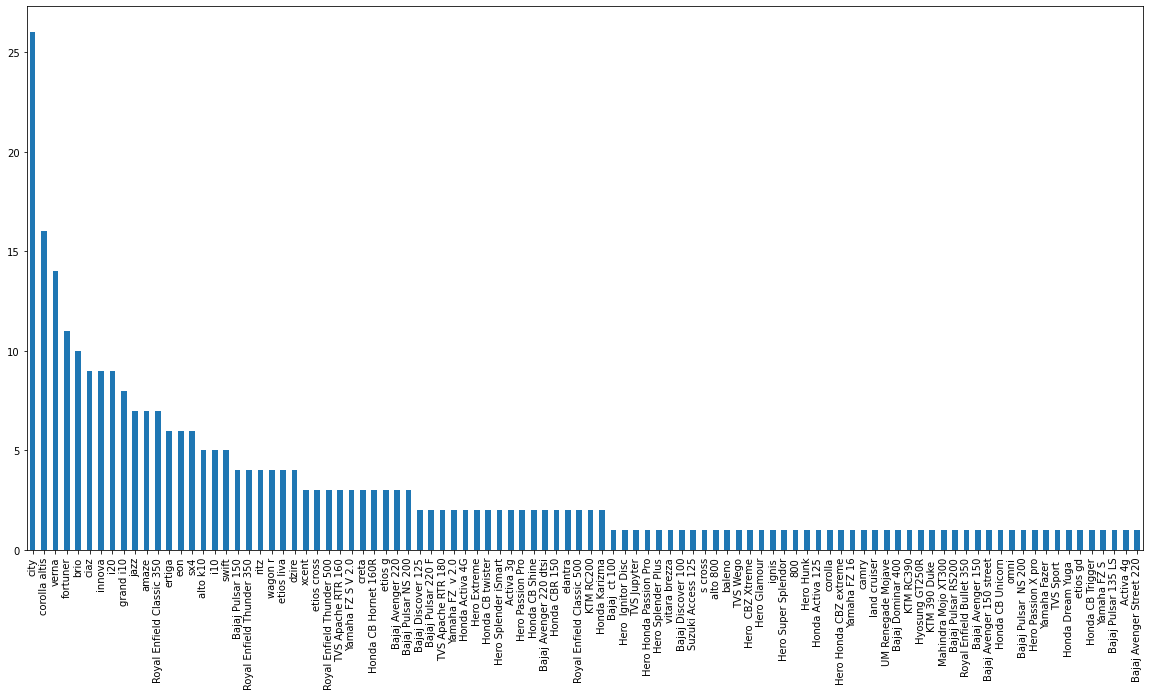

In [20]:
plt.figure(figsize=(20,10))
df['car_name'].value_counts().plot(kind='bar')
#distribution of car is highly biased. So we'll need to adative smoothing for target encoding to avoid overfitting

In [21]:
df['car_name'].nunique()

98

In [22]:
car_count = df['car_name'].value_counts()

In [23]:
car_with_single_instance = list(car_count[car_count==1].index)

In [24]:
df['car_name'] 

0                           ritz
1                            sx4
2                           ciaz
3                        wagon r
4                          swift
5                  vitara brezza
6                           ciaz
7                        s cross
8                           ciaz
9                           ciaz
10                      alto 800
11                          ciaz
12                          ciaz
13                        ertiga
14                         dzire
15                        ertiga
16                        ertiga
17                        ertiga
18                       wagon r
19                           sx4
20                      alto k10
21                         ignis
22                           sx4
23                      alto k10
24                       wagon r
25                         swift
26                         swift
27                         swift
28                      alto k10
29                          ciaz
30        

In [25]:
#df['car_name'].replace(car_with_single_instance, 'car1', inplace=True)

In [26]:
df['owner'].value_counts()  #won't add much info. we shoud drop this feature

0    290
1     10
3      1
Name: owner, dtype: int64

In [27]:

cat_features = [col for col in list(df.columns) if df.dtypes[col]== 'object']
n = len(cat_features)
cat_features   

['car_name', 'fuel_type', 'seller_type', 'transmission']

In [28]:
numeric_features = [col for col in list(df.columns) if col not in  cat_features]
numeric_features

['year', 'selling_price', 'present_price', 'kms_driven', 'owner']

<AxesSubplot:>

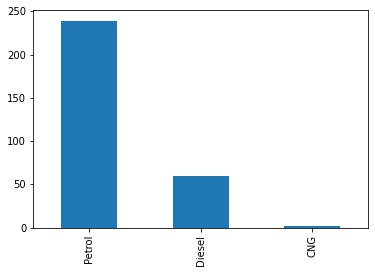

In [29]:
df['fuel_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

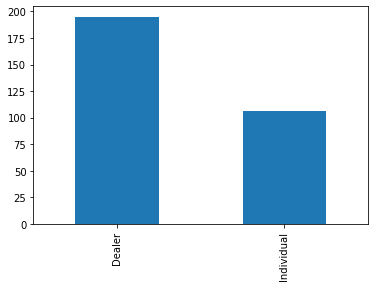

In [30]:
df['seller_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

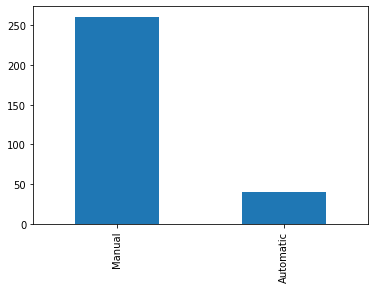

In [31]:
df['transmission'].value_counts().plot(kind='bar')

<Figure size 2880x1440 with 0 Axes>

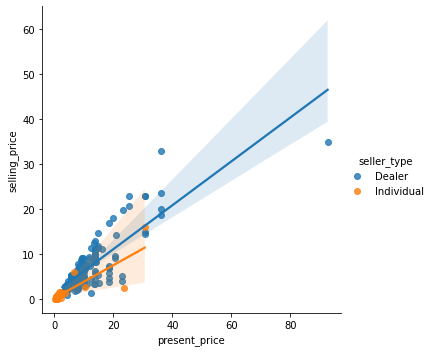

In [32]:
plt.figure(figsize=(40,20))
sns.lmplot(x='present_price', y='selling_price', data=df, hue='seller_type')
#As expected, there is high correlation between present price and selling_price

<Figure size 2880x1440 with 0 Axes>

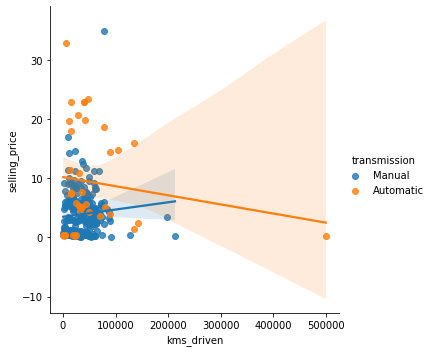

In [33]:
plt.figure(figsize=(40,20))
sns.lmplot(x='kms_driven', y='selling_price', data=df, hue='transmission')
#selling price increases as kms driven increses for manual car. unexpected

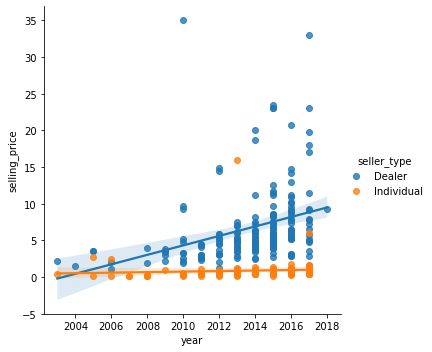

In [34]:
sns.lmplot(x='year', y='selling_price', data=df, hue='seller_type')

<Figure size 2880x1440 with 0 Axes>

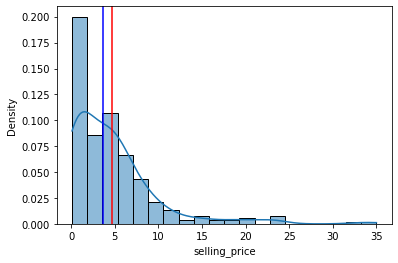

<Figure size 2880x1440 with 0 Axes>

In [35]:
sns.histplot(df, x='selling_price', bins=20, kde=True,stat='density')
plt.axvline(x=df['selling_price'].mean(),
            color='red')
plt.axvline(x=df['selling_price'].median(),
            color='blue')
plt.figure(figsize=(40,20))

<Figure size 2880x1440 with 0 Axes>

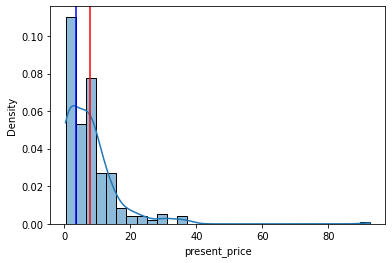

<Figure size 2880x1440 with 0 Axes>

In [36]:
sns.histplot(df, x='present_price', bins=30, kde=True,stat='density')
plt.axvline(x=df['present_price'].mean(),
            color='red')
plt.axvline(x=df['selling_price'].median(),
            color='blue')
plt.figure(figsize=(40,20))

<AxesSubplot:xlabel='selling_price', ylabel='transmission'>

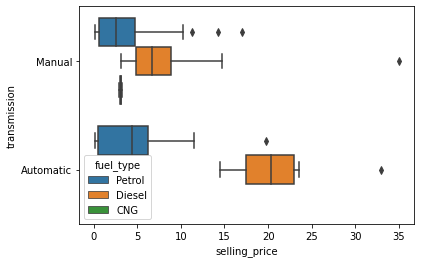

In [37]:
sns.boxplot(x = 'selling_price', y='transmission', hue='fuel_type' ,data=df)
#There is significant difference between price manual and automatic car if it's powered by diesel

# Feature Engineering

In [38]:
df['age'] = df['year'].apply(lambda y: df['year'].max() - y)

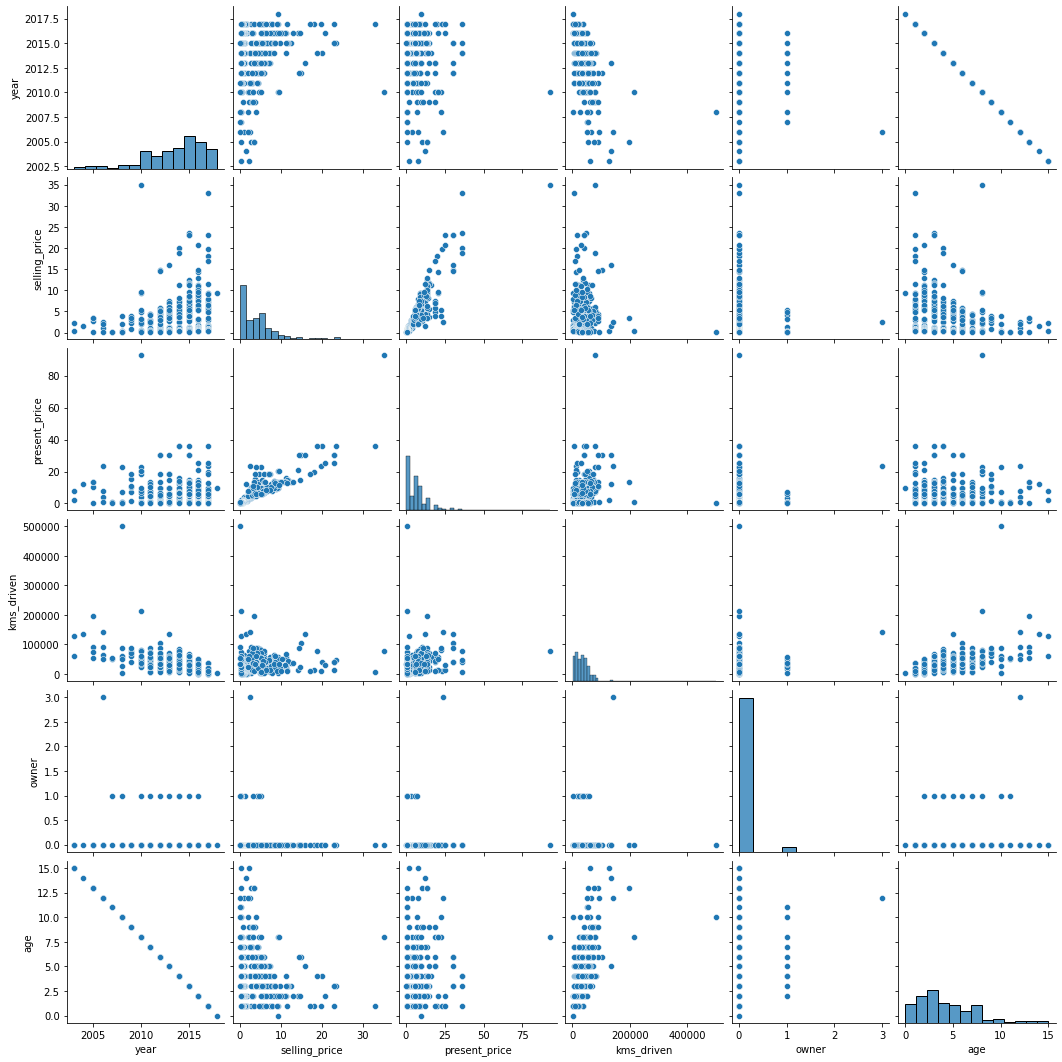

In [39]:
sns.pairplot(df)

<AxesSubplot:>

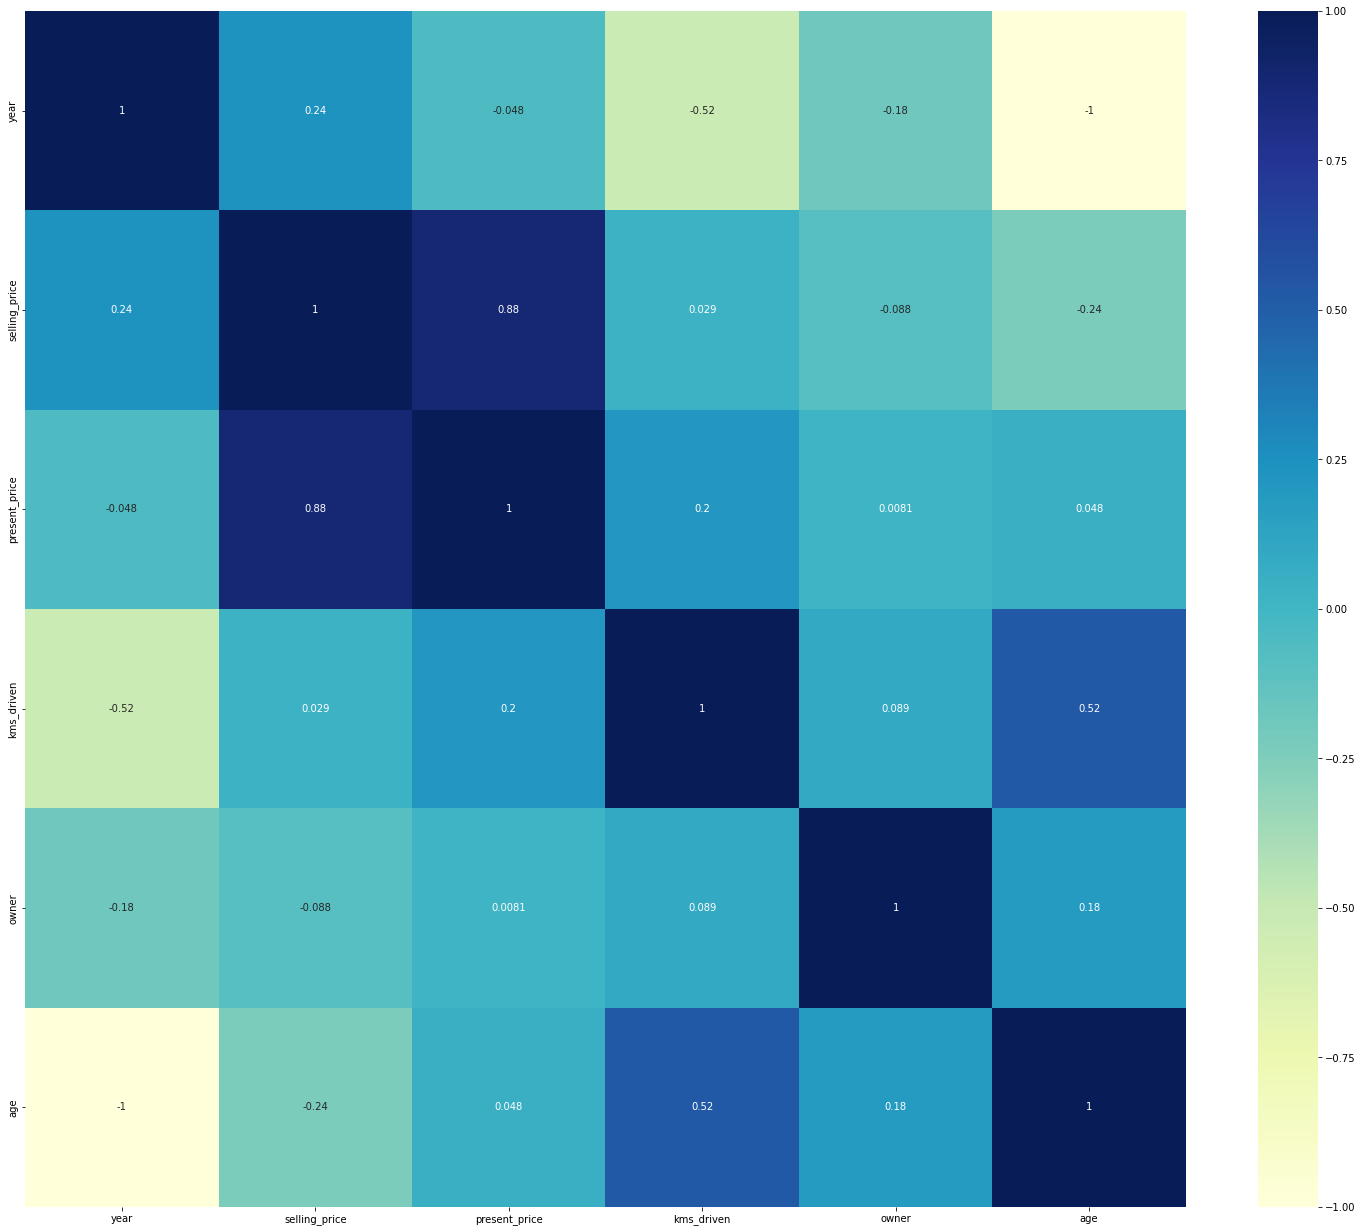

In [40]:
correlations = df.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(correlations,annot=True,cmap="YlGnBu")


In [41]:
df.drop(['owner', 'year'],axis=1, inplace=True)

# Outlier handling

In [42]:
numeric_features = [col for col in df.columns if df[col].dtype !='object']
numeric_features

['selling_price', 'present_price', 'kms_driven', 'age']

In [43]:
numeric_features  = [f for f in numeric_features if f !='selling_price']
numeric_features

['present_price', 'kms_driven', 'age']

In [44]:
def plot(df, col):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1)
    sns.distplot(df[col], ax=ax2, kde=True)
    sns.boxplot(df[col], ax=ax3)
    


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

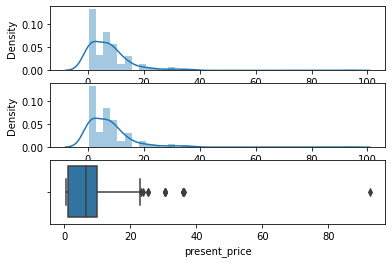

In [45]:
plot(df, 'present_price')


In [46]:
def process_outliers(df, col):
    plot(df, col)
    Q1 = np.percentile(df[col], 25, interpolation= 'midpoint')
    Q3 = np.percentile(df[col], 75, interpolation= 'midpoint')
    IQR = Q3-Q1
    upper_threshold = Q3 +1.5*IQR
    lower_threshold = Q1 - 1.5*IQR
    print(f'{col} lower threshold = {lower_threshold}, upper threshold = {upper_threshold}')
    final_col = np.where(((df[col] >= upper_threshold) | (df[col] <= lower_threshold)), df[col].median(), df[col])
    return final_col


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

present_price lower threshold = -11.850000000000001, upper threshold = 22.950000000000003
kms_driven lower threshold = -35650.5, upper threshold = 99417.5


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

age lower threshold = -4.0, upper threshold = 12.0


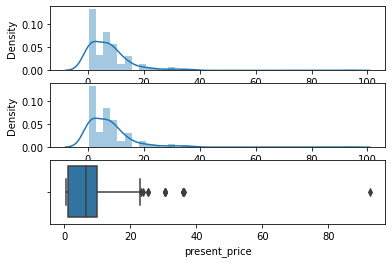

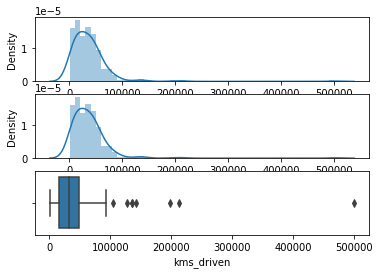

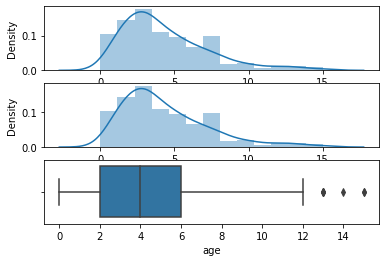

In [47]:
for col in numeric_features:
    df[col] = process_outliers(df, col)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

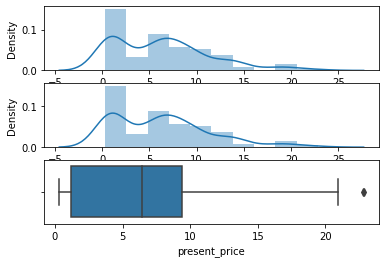

In [48]:
plot(df, 'present_price')

# Encode categorical features

In [49]:
cat_features

['car_name', 'fuel_type', 'seller_type', 'transmission']

In [50]:
def target_encoding_with_smoothing(df, col, m):
    means = df[[col, 'selling_price']].groupby(col).mean().reset_index()
    counts = df[[col, 'selling_price']].groupby(col).count().reset_index()['selling_price']
    key = means[col]
    val = means['selling_price']
    total_mean = df['selling_price'].mean()
    mapper = {j: (counts[i]*val[i]+ m*total_mean)/(m+counts[i])  for i, j in enumerate(key)}
    df[col+'_enc'] = df[col].map(mapper)
    df.drop([col], axis=1, inplace=True)
    return df

In [51]:

df = target_encoding_with_smoothing(df, 'car_name', 20)


In [52]:
df.head()

,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,age,car_name_enc
0,3.35,5.59,27000.0,Petrol,Dealer,Manual,4.0,4.361496
1,4.75,9.54,43000.0,Diesel,Dealer,Manual,5.0,4.314458
2,7.25,9.85,6900.0,Petrol,Dealer,Manual,1.0,5.533652
3,2.85,4.15,5200.0,Petrol,Dealer,Manual,7.0,4.303163
4,4.60,6.87,42450.0,Diesel,Dealer,Manual,4.0,4.637037


In [53]:


#import pandas as pd
df = pd.get_dummies(df, columns = [ 'fuel_type', 'seller_type', 'transmission'])

In [54]:
df.head()

,selling_price,present_price,kms_driven,age,car_name_enc,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,3.35,5.59,27000.0,4.0,4.361496,0,0,1,1,0,0,1
1,4.75,9.54,43000.0,5.0,4.314458,0,1,0,1,0,0,1
2,7.25,9.85,6900.0,1.0,5.533652,0,0,1,1,0,0,1
3,2.85,4.15,5200.0,7.0,4.303163,0,0,1,1,0,0,1
4,4.60,6.87,42450.0,4.0,4.637037,0,1,0,1,0,0,1


In [55]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# col_trf = ColumnTransformer([
#     ('col_trf',OneHotEncoder(sparse=False,drop='first'), ['fuel_type','seller_type','transmission'])
# ]
# ,remainder='passthrough')

In [56]:
df.shape

(301, 12)

# Feature selection

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2

In [58]:
X = df.drop('selling_price', axis=1)

In [59]:
y = df['selling_price']

In [60]:
imp = pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns = ['importance']
imp = imp.sort_values(by='importance', ascending=False)
imp

,importance
car_name_enc,1.272565
present_price,1.259415
seller_type_Dealer,0.585528
seller_type_Individual,0.542687
age,0.240215
fuel_type_Petrol,0.178198
fuel_type_Diesel,0.160102
kms_driven,0.102878
transmission_Automatic,0.101918
transmission_Manual,0.073983


In [61]:
threshold = 0.1
non_imp_col = []

In [62]:
for col in list(imp.index):
    if imp.loc[col,'importance'] < threshold:
        non_imp_col.append(col)

In [63]:
non_imp_col

['transmission_Manual', 'fuel_type_CNG']

In [64]:
df.drop(non_imp_col, axis=1, inplace=True)

In [65]:
df.head()

,selling_price,present_price,kms_driven,age,car_name_enc,fuel_type_Diesel,fuel_type_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic
0,3.35,5.59,27000.0,4.0,4.361496,0,1,1,0,0
1,4.75,9.54,43000.0,5.0,4.314458,1,0,1,0,0
2,7.25,9.85,6900.0,1.0,5.533652,0,1,1,0,0
3,2.85,4.15,5200.0,7.0,4.303163,0,1,1,0,0
4,4.60,6.87,42450.0,4.0,4.637037,1,0,1,0,0


# Test train split

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [67]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
model = RandomForestRegressor()

In [71]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
print('Training_score: {}'.format(model.score(X_train,y_train)))

Training_score: 0.9692677633895207


In [73]:
y_pred = model.predict(X_test)

In [74]:
type(np.array(y_pred))

numpy.ndarray

In [75]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred/ y_true))

In [76]:
def predict(model):
    model.fit(X_train, y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_test)
    print('r2 score {}'.format(metrics.r2_score(y_test, y_pred)))
    print('rmse score {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('absolute error {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
    print('mape {}'.format(mape(y_test, y_pred)))
    plt.figure(figsize=(10,10))
    sns.distplot(np.abs(y_test-y_pred))
    
    

Training_score: 0.9803517219796632
r2 score 0.9185218556817262
rmse score 1.3699987883206328
absolute error 0.6679409836065575
mape 4.040225341077998


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


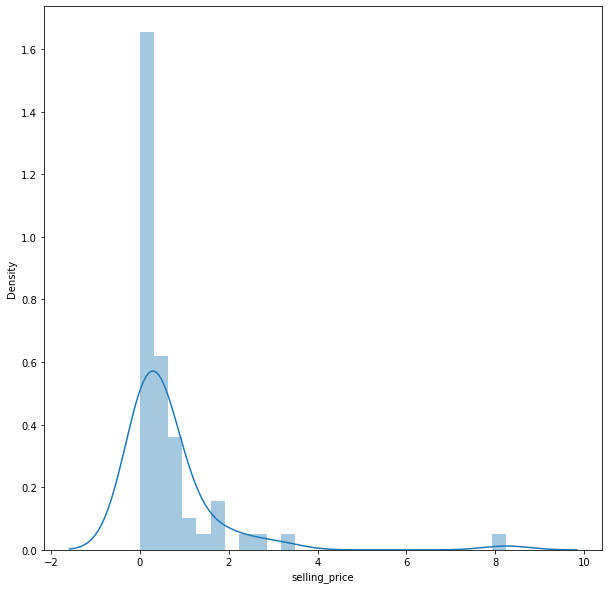

In [77]:
# stat with basic model
predict(RandomForestRegressor())

# Hyperparameter tuning

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
import xgboost as xgb

In [80]:
import sys
!{sys.executable} -m pip install xgboost


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [81]:
xgb_model = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

[00:08:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Training_score: 0.9787780799048026
r2 score 0.9445702605732549
rmse score 1.1299807288190584
absolute error 0.6908242860583008
mape 4.022788356332405


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


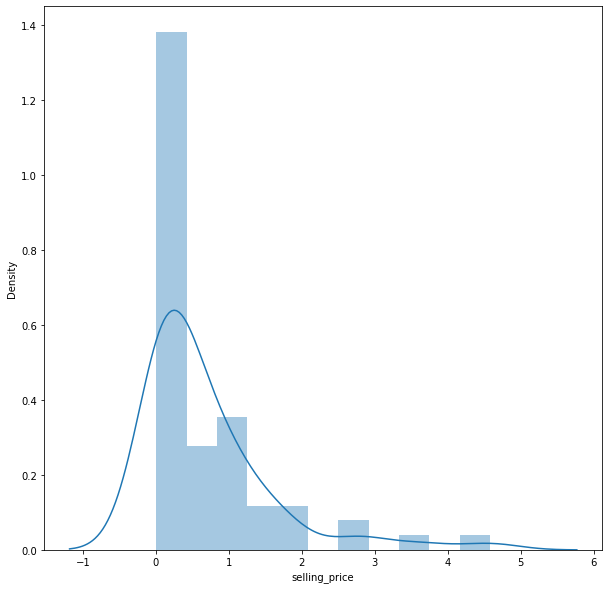

In [82]:
predict(xgb_model)

In [87]:
Parameter_Trials={'n_estimators':[100,200,300,500,1000],
                  'max_leaves': [x for x in range(10)],
                  'max_depth': [x for x in range(300)]}
Parameter_Trials

{'n_estimators': [100, 200, 300, 500, 1000],
 'max_leaves': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'max_depth': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  14

In [90]:
Random_Search = RandomizedSearchCV(xgb_model, Parameter_Trials, n_iter=5, cv=5, n_jobs=1, verbose=5)
RandomSearchResults=Random_Search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[00:59:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END max_depth=99, max_leaves=4, n_estimators=100;, score=0.945 total time=   0.3s
[00:59:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END max_depth=99, max_leaves=4, n_estimators=100;, score=0.677 total time=   0.3s
[00:59:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END max_depth=99, max_leaves=4, n_estimators=100;, score=0.967 total time=   0.3s
[00:59:56] WARNING: /Users/runner/work/xgbo

In [92]:
Random_Search.best_params_

{'n_estimators': 100, 'max_leaves': 4, 'max_depth': 99}

In [94]:
xgb_model_opt = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 100, max_leaves = 4, max_depth = 99, seed = 123)






[01:02:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Training_score: 0.9999999752699644
r2 score 0.9470972909203632
rmse score 1.1039224729827268
absolute error 0.6683096009004311
mape 4.0077745381260135


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


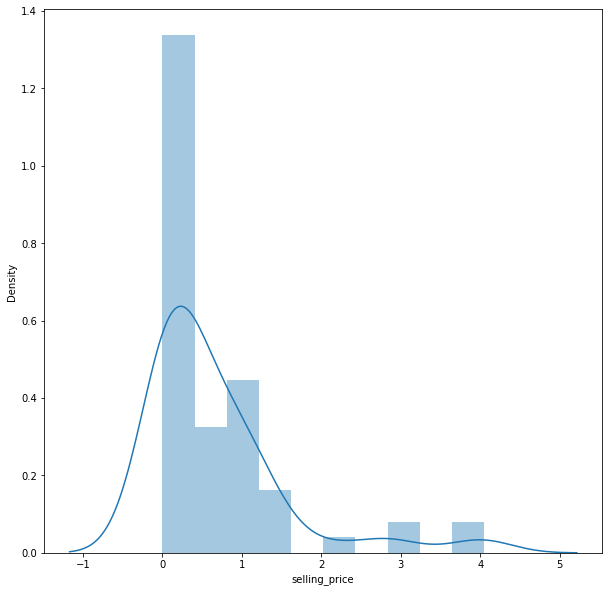

In [95]:
predict(xgb_model_opt)